In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('dark_background')


In [19]:
prices = pd.read_csv("../data/predict_value.csv", index_col=0)

In [40]:
companys = dict()
price = prices.dropna()
for company in price.columns[:5]:
    companys[company] = [
                         price[company][1:].rename(f"{company}-real"),
                        #  price[company+"_lstm"][1:].rename(f"{company}-lstm"),
                         price[company].shift(periods=1)[1:].rename(f"{company}-shift"),
                        #  price[company+"_pred"][1:].rename(f"{company}-predict"),
                         ]

In [41]:
price_len = len(price.index)
step = 5
x_tick = range(0, price_len, price_len//step)

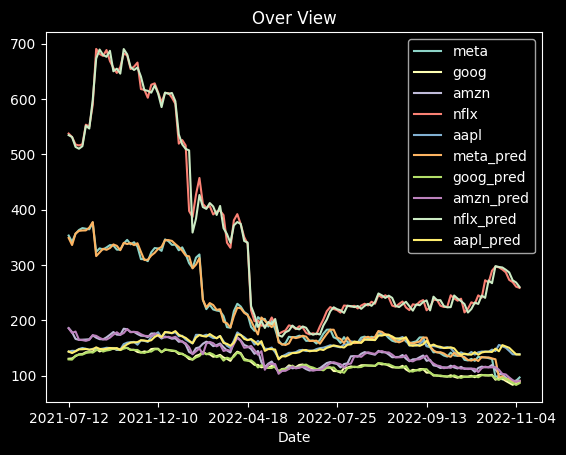

In [42]:
pic = sns.lineplot(data = price.iloc[:, :10], dashes=False)
pic.set_xticks(x_tick, labels=price.index[x_tick])
plt.savefig(f"../src/predict/price.png", transparent = True)
plt.title(f"Over View")
plt.show()

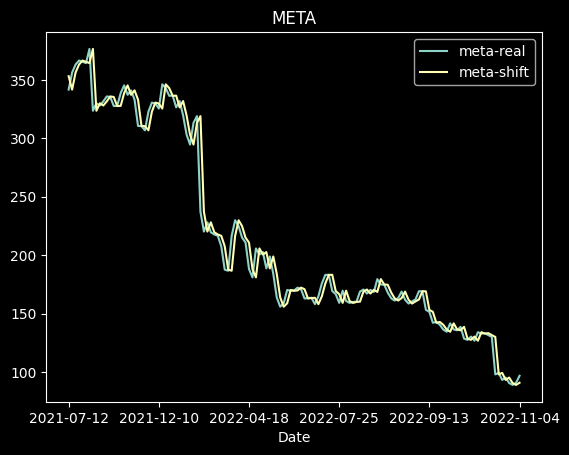

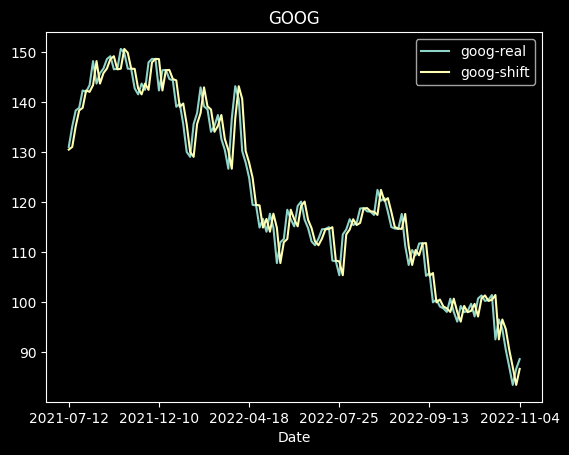

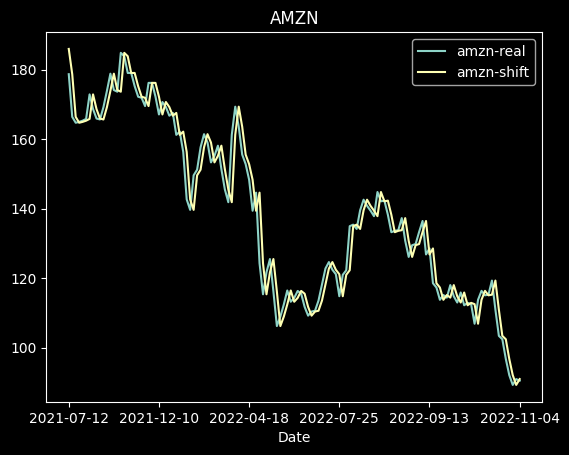

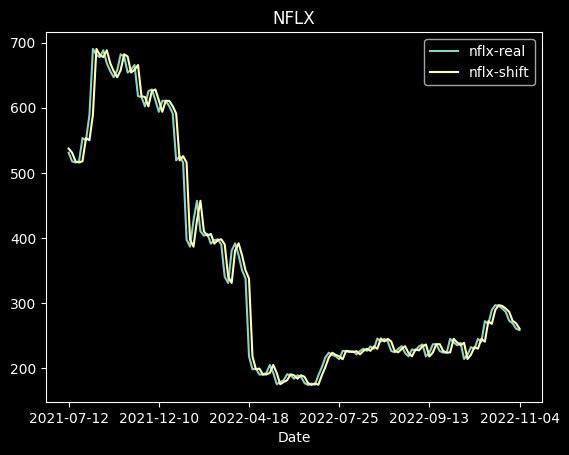

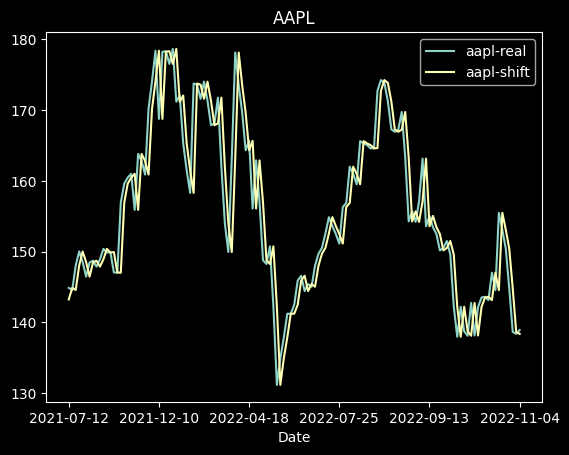

In [43]:
for name in price.columns[:5]:
# for idx in range(4):
    # name = "goog"
    pic = sns.lineplot(data = companys[name], dashes=False)
    pic.set_xticks(x_tick, labels=price.index[x_tick])
    plt.title(f"{name.upper()}")
    plt.savefig(f"../src/predict/compare/{name}-price.png", transparent = True)
    plt.show()

In [23]:
for idx, typ in enumerate(["lstm", "shift", "bert", ]):
    mse, mae = [], []
    for name in price.columns[:5]:
        rms = np.sqrt(mean_squared_error(companys[name][0], companys[name][1+idx]))
        ms = mean_absolute_error(companys[name][0], companys[name][1+idx])
        mse.append(rms)
        mae.append(ms)
        
    print(f"{typ} | MSE{np.average(mse):.3} | MAE{np.average(mae):.3}")

lstm | MSE9.85 | MAE6.83
shift | MSE9.89 | MAE6.18
bert | MSE6.21 | MAE4.14
